In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

import torch
from torchsummary import summary # For tensorflow-like model summary

# Import local function and class definitions
from net import *
from visual_utils import *
from dataset_utils import *

DEVICE = initialize_device()

Current device: NVIDIA GeForce RTX 3080
Current device: NVIDIA GeForce RTX 3080
Current device: NVIDIA GeForce RTX 3080


In [2]:
# Import the trained model for demonstration purposes
net = torch.load('data/net-demo.pt').to(DEVICE)

In [3]:
# Print a summary of the model
summary(net, input_size=(3,256,512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 256, 512]             448
            Conv2d-2         [-1, 32, 256, 512]          12,832
            Conv2d-3         [-1, 64, 256, 512]         100,416
            Conv2d-4        [-1, 128, 256, 512]         663,680
    RegionNet_Stem-5        [-1, 128, 256, 512]               0
            Conv2d-6         [-1, 32, 256, 512]         102,432
       BatchNorm2d-7         [-1, 32, 256, 512]              64
            Conv2d-8         [-1, 32, 256, 512]         102,432
       BatchNorm2d-9         [-1, 32, 256, 512]              64
           Conv2d-10         [-1, 32, 256, 512]         102,432
      BatchNorm2d-11         [-1, 32, 256, 512]              64
           Conv2d-12         [-1, 32, 256, 512]         102,432
      BatchNorm2d-13         [-1, 32, 256, 512]              64
CombineRegionConv-14        [-1, 128, 2

In [6]:
# Import a single sample of data for demonstration
file = open(f'data/demo_data', 'rb')
demo_input, demo_labels = pickle.load(file)
file.close()

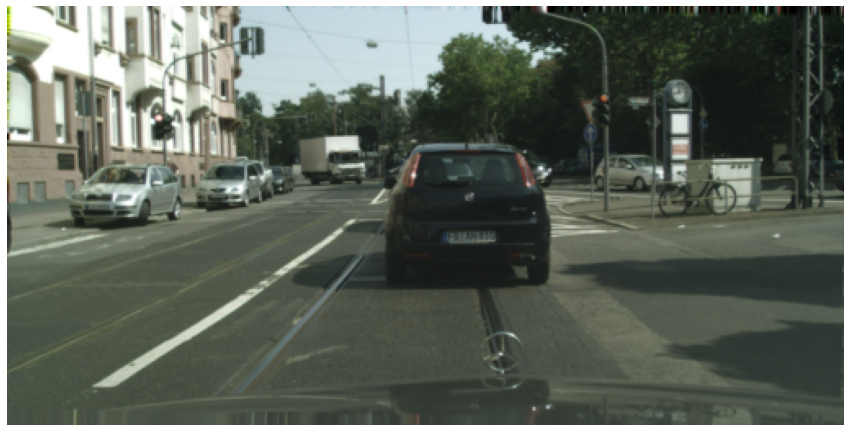

In [7]:
# Plot the input image
plt.figure(figsize=(15,10))
imshow(demo_input)
plt.show()

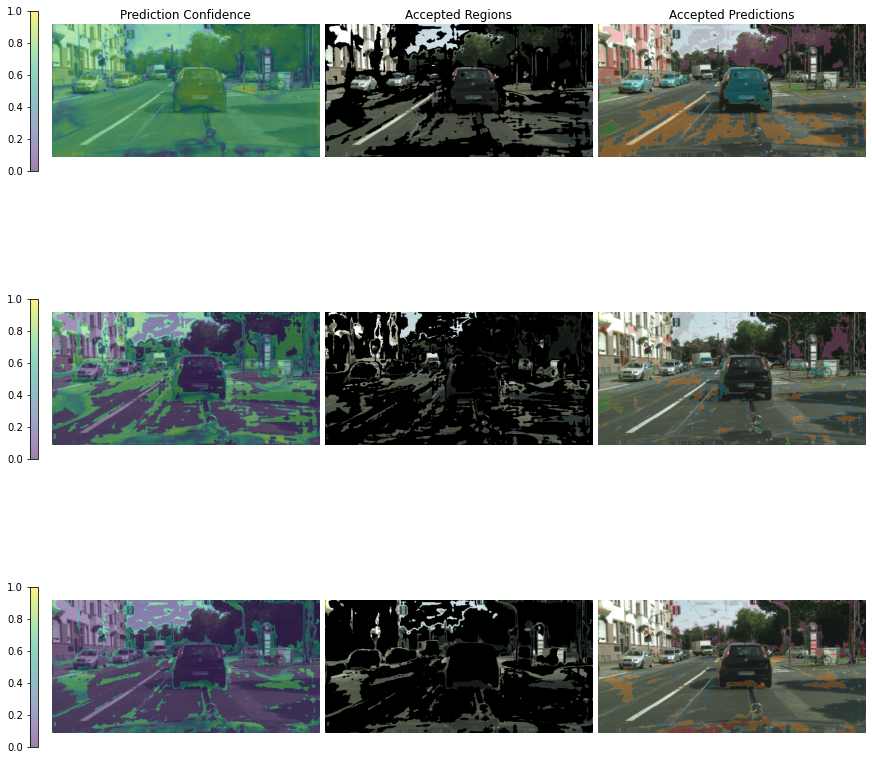

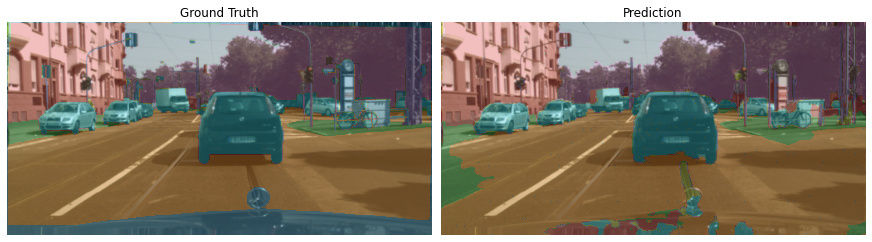

In [8]:
# Normalise the image for the model
img_normal = normalize(demo_input).to(DEVICE).unsqueeze(0)

# The number of classes in this case is 10
n_classes = 10

# Define the q parameter vector 
# (set these values to whatever you like)
class_qs = [0.5 for _ in range(n_classes)]

# Perform a forward pass
out1, mask1, out2, mask2, out3 = net(img_normal, class_qs)

# Processes raw model output and converts it into visualisable data
confs1, confs2, confs3, out1, out2, out3, mask1, mask2, preds = process_output(out1, out2, out3, mask1, mask2)

# Plot the prediction confidence, accepted regions and accepted predictions of each stage
plot_stages(demo_input, confs1, confs2, confs3, mask1, mask2, out1, out2, out3)
plt.show()

# Plot the ground truth and model prediction side-by-side
plot_results(demo_input, preds, demo_labels)
plt.show()